In [1]:
!pip install PIL
!pip install opencv-python
!pip install --upgrade tensorflow

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflowjs 4.16.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.


In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

In [3]:
size = (128,128)
def preprocess_image(image, target_size = size):
    resized_image = image.resize(target_size)
    image_array = np.array(resized_image)
    if image_array.dtype == np.uint8:  
        image_array = image_array.astype(np.float32) / 255.0 
    return image_array

In [4]:
def jpg_to_array(folder_path, target_size= size):
    image_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            preprocessed_image = preprocess_image(image, target_size)
            image_list.append(preprocessed_image)
    return np.array(image_list)

In [5]:
true_path = "/kaggle/input/test-dataset/Fire-Detection/1/"
false_path = "/kaggle/input/test-dataset/Fire-Detection/0/"
target_size = size
true_data = jpg_to_array(true_path, target_size)
false_data = jpg_to_array(false_path, target_size)
np.random.seed(1)  # Tekrarlanabilirlik için seed ayarı
combined_array = np.concatenate((true_data, false_data), axis=0)
indices = np.random.permutation(len(combined_array))
combined_array = combined_array[indices]


In [6]:
true_labels = np.ones(len(true_data))
false_labels = np.zeros(len(false_data))
combined_labels = np.concatenate((true_labels, false_labels), axis=0)
combined_labels = combined_labels[indices]
print(combined_labels.shape)
print(combined_labels[0])

(624,)
0.0


In [7]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(combined_array, combined_labels, test_size=0.4)

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (374, 128, 128, 3)
Train labels shape: (374,)
Test images shape: (250, 128, 128, 3)
Test labels shape: (250,)


1.0


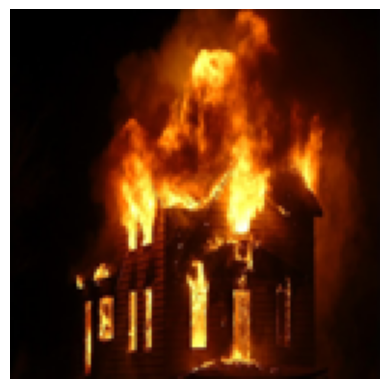

In [8]:
import matplotlib.pyplot as plt
plt.axis("off")
value = 112
plt.imshow(train_images[value])
print(train_labels[value])

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN model for computer vision
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Adjust the number of output classes as needed
])

# Compile the model
model.summary()

2024-02-25 22:08:52.065920: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 22:08:52.065989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 22:08:52.068078: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

In [10]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [11]:
r = model.fit(train_images,train_labels, validation_data = (test_images,test_labels), epochs = 20)

Epoch 1/20
12/12 [==============================] - 7s 510ms/step - loss: 0.4875 - accuracy: 0.7861 - val_loss: 0.3679 - val_accuracy: 0.8240
Epoch 2/20
12/12 [==============================] - 6s 470ms/step - loss: 0.3447 - accuracy: 0.8476 - val_loss: 0.3329 - val_accuracy: 0.8520
Epoch 3/20
12/12 [==============================] - 6s 468ms/step - loss: 0.2862 - accuracy: 0.8476 - val_loss: 0.2931 - val_accuracy: 0.8600
Epoch 4/20
12/12 [==============================] - 6s 471ms/step - loss: 0.2488 - accuracy: 0.8930 - val_loss: 0.2718 - val_accuracy: 0.8640
Epoch 5/20
12/12 [==============================] - 6s 477ms/step - loss: 0.1903 - accuracy: 0.9305 - val_loss: 0.2621 - val_accuracy: 0.8960
Epoch 6/20
12/12 [==============================] - 6s 485ms/step - loss: 0.1979 - accuracy: 0.9332 - val_loss: 0.2751 - val_accuracy: 0.8760
Epoch 7/20
12/12 [==============================] - 5s 460ms/step - loss: 0.1511 - accuracy: 0.9385 - val_loss: 0.2900 - val_accuracy: 0.9120
Epoch 

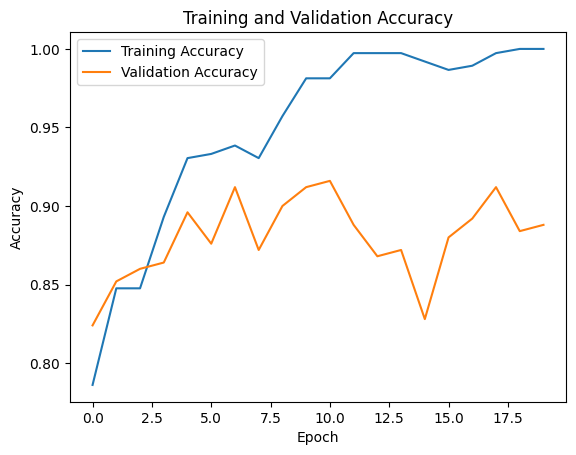

In [12]:
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

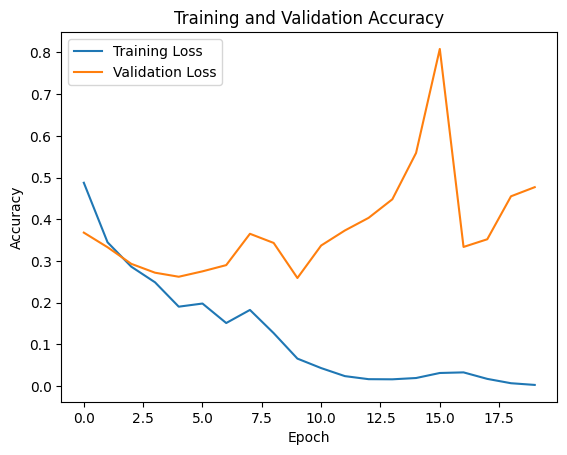

In [13]:
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 138ms/step
Not Fire
[[1.2982707e-13]]


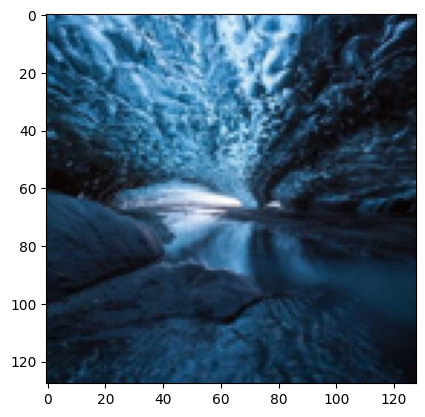

In [14]:
v = 3
p = model.predict(np.expand_dims(test_images[v],axis = 0))
if p >= 0.5:
    print("Fire")
else:
    print("Not Fire")
plt.imshow(test_images[v])
print(p)
